In [1]:
import h5py
import galaxychop as gchop
import uttr
import attr
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# Read Galaxy

In [2]:
gal = gchop.read_hdf5("../galaxy-chop/tests/datasets/gal394242.h5")

In [3]:
galc = gchop.center(gal)
gal = gchop.star_align(gchop.center(gal))

## [ Scatter ]

## Star Particles

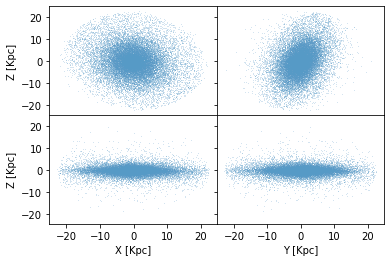

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(wspace=0, hspace=0)
ax1 = galc.plot.scatter("x","z", alpha=.5, s=0.5, ptypes=['stars'], legend=False, ax=ax1)
ax2 = galc.plot.scatter("y","z", alpha=.5, s=0.5, ptypes=['stars'], legend=False, ax=ax2)
ax3 = gal.plot.scatter("x","z", alpha=.5, s=0.5, ptypes=['stars'], legend=False, ax=ax3)
ax4 = gal.plot.scatter("y","z", alpha=.5, s=0.5, ptypes=['stars'], legend=False, ax=ax4)

ax4.set_xlabel('Y [Kpc]')
ax3.set_xlabel('X [Kpc]')
ax3.set_ylabel('Z [Kpc]')
ax1.set_ylabel('Z [Kpc]')

plt.savefig('gchop_plots/pos_plane_stars.png', dpi=100)

## All Particles

Text(0, 0.5, 'Z [Kpc]')

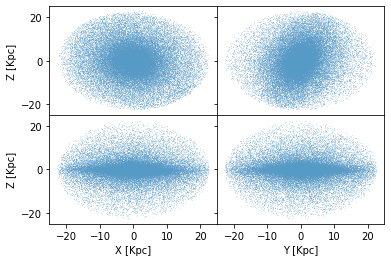

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(wspace=0, hspace=0)
ax1 = galc.plot.scatter("x","z", alpha=.5, s=0.5, legend=False, ax=ax1)
ax2 = galc.plot.scatter("y","z", alpha=.5, s=0.5, legend=False, ax=ax2)
ax3 = gal.plot.scatter("x","z", alpha=.5, s=0.5, legend=False, ax=ax3)
ax4 = gal.plot.scatter("y","z", alpha=.5, s=0.5, legend=False, ax=ax4)

ax4.set_xlabel('Y [Kpc]')
ax3.set_xlabel('X [Kpc]')
ax3.set_ylabel('Z [Kpc]')
ax1.set_ylabel('Z [Kpc]')

#plt.savefig('gchop_plots/pos_plane.png', dpi=100)

## [ PairPlots ]

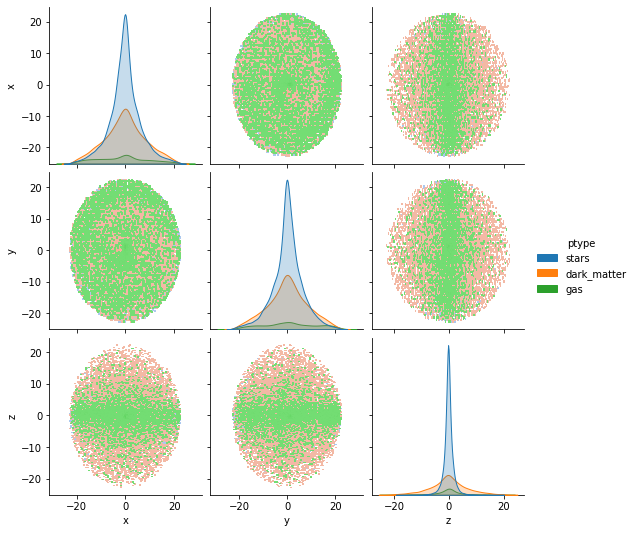

In [6]:
gal.plot.pairplot()

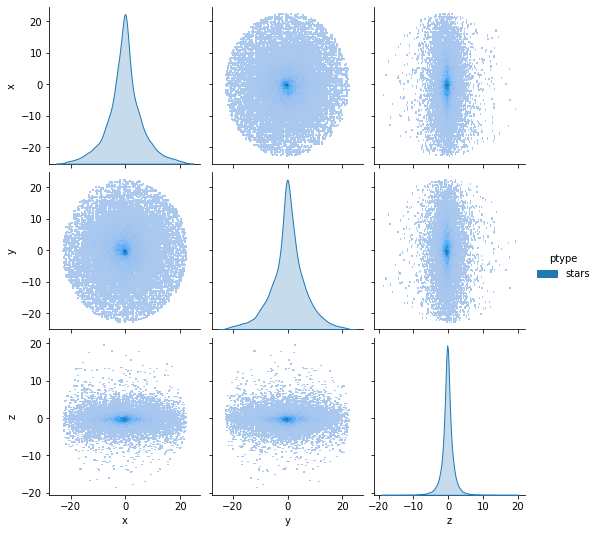

In [7]:
gal.plot.pairplot(labels='ptype', ptypes=['stars'])

## [KDE]

In [ ]:
gal.plot.kde("x", "y", labels='ptype', ptypes=['stars'], fill=True)

In [ ]:
gal.plot.kde("x", "y", labels='ptype', ptypes=['gas'])

In [ ]:
gal.plot.kde("x", "y", labels='ptype', ptypes=['dark_matter'])

## [ Hist ]

In [ ]:
gal.plot.hist("x","y", labels='ptype')

In [ ]:
gal.plot.hist("x", "y", labels='ptype', ptypes=['stars'])

# Read model labels

In [ ]:
df = pd.read_pickle('df_stars.pkl')

In [ ]:
df

In [ ]:
gal.plot.scatter("x", "y", marker='.', linewidth=0, s=4, alpha=0.2, 
                 ptypes=['stars'], labels = df.lab_ab, lmap={0: 'Bulge', 1: 'Disk'})

In [ ]:
xx = gal.stars.x.value
yy = gal.stars.y.value
zz = gal.stars.z.value
labels_ab = df.lab_ab

mask_b = np.where(labels_ab == 0)[0]
mask_d = np.where(labels_ab == 1)[0]

fig, ax = plt.subplots(1,2, figsize=[10, 5])

ax[0].plot(xx[mask_d], yy[mask_d], '.', color='royalblue', ms=1, label='Disk')
ax[0].plot(xx[mask_b], yy[mask_b], '.', color='crimson', ms=1, label='Bulge')
ax[0].set_xlabel('X [Kpc]', fontsize=12)
ax[0].set_ylabel('Y [Kpc]', fontsize=12)


ax[1].plot(xx[mask_d], zz[mask_d], '.', color='royalblue', ms=1, label='Disk')
ax[1].plot(xx[mask_b], zz[mask_b], '.', color='crimson', ms=1, label='Bulge')
ax[1].set_xlabel('X [Kpc]', fontsize=12)
ax[1].set_ylabel('Z [Kpc]', fontsize=12)
ax[1].legend(markerscale=7.)

#plt.savefig('gchop_plots/xyz_lab_ab.png', dpi=100)